In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\Dhanush\DSML\Case Studies\OLA CaseStudy\ola_driver_scaler.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Dhanu\AppData\Local\Temp\ipykernel_52228\1126484395.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Dhanush\DSML\Case Studies\OLA CaseStudy\ola_driver_scaler.csv")


In [3]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [6]:
df.shape

(19104, 14)

In [7]:
df.ndim

2

### NULL check:

In [8]:
(df.isnull().sum())/len(df) *100

Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

Here AGE and GENDER column's null values must be taken care:
* AGE column null values can be replaced with mean value.
* since Gender cannot be given any biased values, we will drop it, and as it is also less then 0.3% of the data.
* as we will be grouping the dataset driver ID LastWorkingDate's null values will be removed.

In [9]:
age_mean = int(round(df['Age'].mean()))
df['Age'].fillna(age_mean, inplace=True)

In [10]:
df['Age'].nunique()

36

In [11]:
(df.isnull().sum())/len(df) *100

Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.000000
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [12]:
df.dropna(subset= ['Gender'], inplace=True)

In [13]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

### Changing all the datatype as needed.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19052 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19052 non-null  object 
 1   Driver_ID             19052 non-null  int64  
 2   Age                   19052 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19052 non-null  object 
 5   Education_Level       19052 non-null  int64  
 6   Income                19052 non-null  int64  
 7   Dateofjoining         19052 non-null  object 
 8   LastWorkingDate       1611 non-null   object 
 9   Joining Designation   19052 non-null  int64  
 10  Grade                 19052 non-null  int64  
 11  Total Business Value  19052 non-null  int64  
 12  Quarterly Rating      19052 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.0+ MB


Looking at dataset describe result:
* MMM-YY, DateofJoining, LastWorkingDate should be changed to datatime type.

In [15]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

C:\Users\Dhanu\AppData\Local\Temp\ipykernel_52228\3944046961.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
C:\Users\Dhanu\AppData\Local\Temp\ipykernel_52228\3944046961.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
C:\Users\Dhanu\AppData\Local\Temp\ipykernel_52228\3944046961.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19052 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19052 non-null  datetime64[ns]
 1   Driver_ID             19052 non-null  int64         
 2   Age                   19052 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19052 non-null  object        
 5   Education_Level       19052 non-null  int64         
 6   Income                19052 non-null  int64         
 7   Dateofjoining         19052 non-null  datetime64[ns]
 8   LastWorkingDate       1611 non-null   datetime64[ns]
 9   Joining Designation   19052 non-null  int64         
 10  Grade                 19052 non-null  int64         
 11  Total Business Value  19052 non-null  int64         
 12  Quarterly Rating      19052 non-null  int64         
dtypes: datetime64[ns](3),

In [17]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


Missing value check

In [18]:
missing_values = df.isnull().sum()
print(missing_values)

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17441
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64


In [19]:
testdf = df.copy()

In [20]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
    

numerical_features = ['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating']
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])  

In [21]:
df[numerical_features].isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

### Feature Engineering

In [22]:
agg_functions = {
    "Age": "max",
    "Gender": "first",
    "Education_Level": "last",
    "Income": "last",
    "Joining Designation": "last",
    "Grade": "last",
    "Total Business Value": "sum",
    "Quarterly Rating": "last",
    "LastWorkingDate": "last",
    "City": "first",
    "Dateofjoining": "last"
}

aggregated_df = df.groupby(["Driver_ID", "MMM-YY"]).aggregate(agg_functions).sort_index(ascending = [True, True])

aggregated_df.head()

Age  Gender  Education_Level   Income  \
Driver_ID MMM-YY                                               
1         2019-01-01  28.0     0.0              2.0  57387.0   
          2019-02-01  28.0     0.0              2.0  57387.0   
          2019-03-01  28.0     0.0              2.0  57387.0   
2         2020-11-01  31.0     0.0              2.0  67016.0   
          2020-12-01  31.0     0.0              2.0  67016.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1         2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2         2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   

                      Quarterly Rating LastWorkingDate City Dateofjoining  
Driver_ID MMM-YY                                                           
1         2019-01-01               2.0             NaT  C23    2018-12-24  
          2019-02-01               2.0             NaT  C23    2018-12-24  
          2019-03-01               2.0      2019-03-11  C23    2018-12-24  
2         2020-11-01               1.0             NaT   C7    2020-11-06  
          2020-12-01               1.0             NaT   C7    2020-11-06

In [23]:
final_df = pd.DataFrame()

In [24]:
final_df["Driver_ID"] = df["Driver_ID"].unique()

In [25]:
final_df['Age'] = list(aggregated_df.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
final_df['Gender'] = list(aggregated_df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
final_df['City'] = list(aggregated_df.groupby('Driver_ID').agg({'City':'last'})['City'])
final_df['Education'] = list(aggregated_df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
final_df['Income'] = list(aggregated_df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
final_df['Joining_Designation'] = list(aggregated_df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
final_df['Grade'] = list(aggregated_df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
final_df['Total_Business_Value'] = list(aggregated_df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
final_df['Last_Quarterly_Rating'] = list(aggregated_df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

C:\Users\Dhanu\AppData\Local\Temp\ipykernel_52228\1179606293.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  final_df['Age'] = list(aggregated_df.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
C:\Users\Dhanu\AppData\Local\Temp\ipykernel_52228\1179606293.py:8: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  final_df['Total_Business_Value'] = list(aggregated_df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])


In [26]:
final_df.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0


In [27]:
final_df.describe()

,Driver_ID,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000
mean,1397.559009,33.811004,0.410332,1.00756,59334.157077,1.820244,2.096598,4.579832e+06,1.428391
std,806.161628,5.910571,0.491997,0.81629,28383.666384,0.841433,0.941522,9.119725e+06,0.809876
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000
25%,695.000000,30.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.070400e+05,1.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.169060e+06,2.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000


In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Driver_ID              2381 non-null   int64  
 1   Age                    2381 non-null   float64
 2   Gender                 2381 non-null   float64
 3   City                   2381 non-null   object 
 4   Education              2381 non-null   float64
 5   Income                 2381 non-null   float64
 6   Joining_Designation    2381 non-null   float64
 7   Grade                  2381 non-null   float64
 8   Total_Business_Value   2381 non-null   float64
 9   Last_Quarterly_Rating  2381 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 186.1+ KB


In [29]:
aggregated_df.head()

Age  Gender  Education_Level   Income  \
Driver_ID MMM-YY                                               
1         2019-01-01  28.0     0.0              2.0  57387.0   
          2019-02-01  28.0     0.0              2.0  57387.0   
          2019-03-01  28.0     0.0              2.0  57387.0   
2         2020-11-01  31.0     0.0              2.0  67016.0   
          2020-12-01  31.0     0.0              2.0  67016.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1         2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2         2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   

                      Quarterly Rating LastWorkingDate City Dateofjoining  
Driver_ID MMM-YY                                                           
1         2019-01-01               2.0             NaT  C23    2018-12-24  
          2019-02-01               2.0             NaT  C23    2018-12-24  
          2019-03-01               2.0      2019-03-11  C23    2018-12-24  
2         2020-11-01               1.0             NaT   C7    2020-11-06  
          2020-12-01               1.0             NaT   C7    2020-11-06

In [30]:
# Calculate Quarterly Rating Increase
aggregated_df['Rating_Change'] = aggregated_df.groupby('Driver_ID')['Quarterly Rating'].diff().fillna(0)
aggregated_df['Rating_Increased'] = np.where(aggregated_df['Rating_Change'] > 0, 1, 0)

# Aggregating by Driver_ID to check if there's any increase in rating over the period
driver_rating_increase = aggregated_df.groupby('Driver_ID')['Rating_Increased'].max().reset_index()

# Merge with final_df
final_df = final_df.merge(driver_rating_increase, on='Driver_ID', how='left')


In [31]:
aggregated_df['LastWorkingDate'] = pd.to_datetime(aggregated_df['LastWorkingDate'], errors='coerce')

# Create Target Column: 1 if LastWorkingDate is present, 0 otherwise
aggregated_df['Target'] = np.where(aggregated_df['LastWorkingDate'].notna(), 1, 0)

# Aggregating by Driver_ID to get the maximum Target value (if any row has left the company)
driver_target = aggregated_df.groupby('Driver_ID')['Target'].max().reset_index()

# Merge with final_df
final_df = final_df.merge(driver_target, on='Driver_ID', how='left')

In [32]:
# Create target variable for drivers who have left
'''aggregated_df['Target'] = aggregated_df.groupby('Driver_ID')['LastWorkingDate'].diff().apply(lambda x: 1 if pd.notnull(x) else 0)

Target = aggregated_df[['Driver_ID', 'Target']]
final_df = final_df.merge(Target, on='Driver_ID', how='left').astype({'Target': int})'''

"aggregated_df['Target'] = aggregated_df.groupby('Driver_ID')['LastWorkingDate'].diff().apply(lambda x: 1 if pd.notnull(x) else 0)\n\nTarget = aggregated_df[['Driver_ID', 'Target']]\nfinal_df = final_df.merge(Target, on='Driver_ID', how='left').astype({'Target': int})"

In [33]:
# Calculate Monthly Income Increase
aggregated_df['Income_Change'] = aggregated_df.groupby('Driver_ID')['Income'].diff().fillna(0)
aggregated_df['Income_Increased'] = np.where(aggregated_df['Income_Change'] > 0, 1, 0)

# Aggregating by Driver_ID to check if there's any increase in income over the period
driver_income_increase = aggregated_df.groupby('Driver_ID')['Income_Increased'].max().reset_index()

# Merge with final_df
final_df = final_df.merge(driver_income_increase, on='Driver_ID', how='left')

In [34]:
final_df.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Rating_Increased,Target,Income_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0


In [35]:
final_df.shape

(2381, 13)

In [36]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.381100e+01,5.910571e+00,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining_Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total_Business_Value,2381.0,4.579832e+06,9.119725e+06,-1385530.0,0.0,807040.0,4169060.0,95331060.0
Last_Quarterly_Rating,2381.0,1.428391e+00,8.098762e-01,1.0,1.0,1.0,2.0,4.0
Rating_Increased,2381.0,3.456531e-01,4.756806e-01,0.0,0.0,0.0,1.0,1.0


In [37]:
final_df.describe(include = 'object')

,City
count,2381
unique,29
top,C20
freq,152


In [38]:
final_df["Gender"].value_counts()

Gender
0.0    1404
1.0     977
Name: count, dtype: int64

In [39]:
final_df["Target"].value_counts()

Target
1    1611
0     770
Name: count, dtype: int64

In [40]:
n = ['Gender','Education','Joining_Designation','Grade','Last_Quarterly_Rating','Rating_Increased']

for i in n:
    print("------------------------------------------------------------")
    print(final_df[i].value_counts(normalize=True) * 100)

------------------------------------------------------------
Gender
0.0    58.966821
1.0    41.033179
Name: proportion, dtype: float64
------------------------------------------------------------
Education
2.0    33.683326
1.0    33.389332
0.0    32.927341
Name: proportion, dtype: float64
------------------------------------------------------------
Joining_Designation
1.0    43.091138
2.0    34.229315
3.0    20.705586
4.0     1.511970
5.0     0.461991
Name: proportion, dtype: float64
------------------------------------------------------------
Grade
2.0    35.909282
1.0    31.121378
3.0    26.165477
4.0     5.795884
5.0     1.007980
Name: proportion, dtype: float64
------------------------------------------------------------
Last_Quarterly_Rating
1.0    73.204536
2.0    15.245695
3.0     7.055859
4.0     4.493910
Name: proportion, dtype: float64
------------------------------------------------------------
Rating_Increased
0    65.434691
1    34.565309
Name: proportion, dtype: float64


### Univariant Analysis

In [41]:
# Frequency Distribution for Categorical Columns
categorical_columns = ['Gender', 'City', 'Education', 'Joining_Designation', 'Grade', 'Rating_Increased', 'Target', 'Income_Increased']

frequency_distributions = {col: final_df[col].value_counts(normalize=True).mul(100).round(2) for col in categorical_columns}

for col, freq in frequency_distributions.items():
    print(f"Frequency Distribution for {col}:\n{freq}\n")

Frequency Distribution for Gender:
Gender
0.0    58.97
1.0    41.03
Name: proportion, dtype: float64

Frequency Distribution for City:
City
C20    6.38
C15    4.24
C29    4.03
C26    3.91
C8     3.74
C27    3.74
C10    3.61
C16    3.53
C22    3.44
C3     3.44
C28    3.44
C12    3.40
C5     3.36
C1     3.36
C21    3.32
C14    3.32
C6     3.28
C4     3.23
C7     3.19
C9     3.15
C25    3.11
C23    3.11
C24    3.07
C19    3.02
C2     3.02
C17    2.98
C13    2.98
C18    2.90
C11    2.69
Name: proportion, dtype: float64

Frequency Distribution for Education:
Education
2.0    33.68
1.0    33.39
0.0    32.93
Name: proportion, dtype: float64

Frequency Distribution for Joining_Designation:
Joining_Designation
1.0    43.09
2.0    34.23
3.0    20.71
4.0     1.51
5.0     0.46
Name: proportion, dtype: float64

Frequency Distribution for Grade:
Grade
2.0    35.91
1.0    31.12
3.0    26.17
4.0     5.80
5.0     1.01
Name: proportion, dtype: float64

Frequency Distribution for Rating_Increased:
Rating

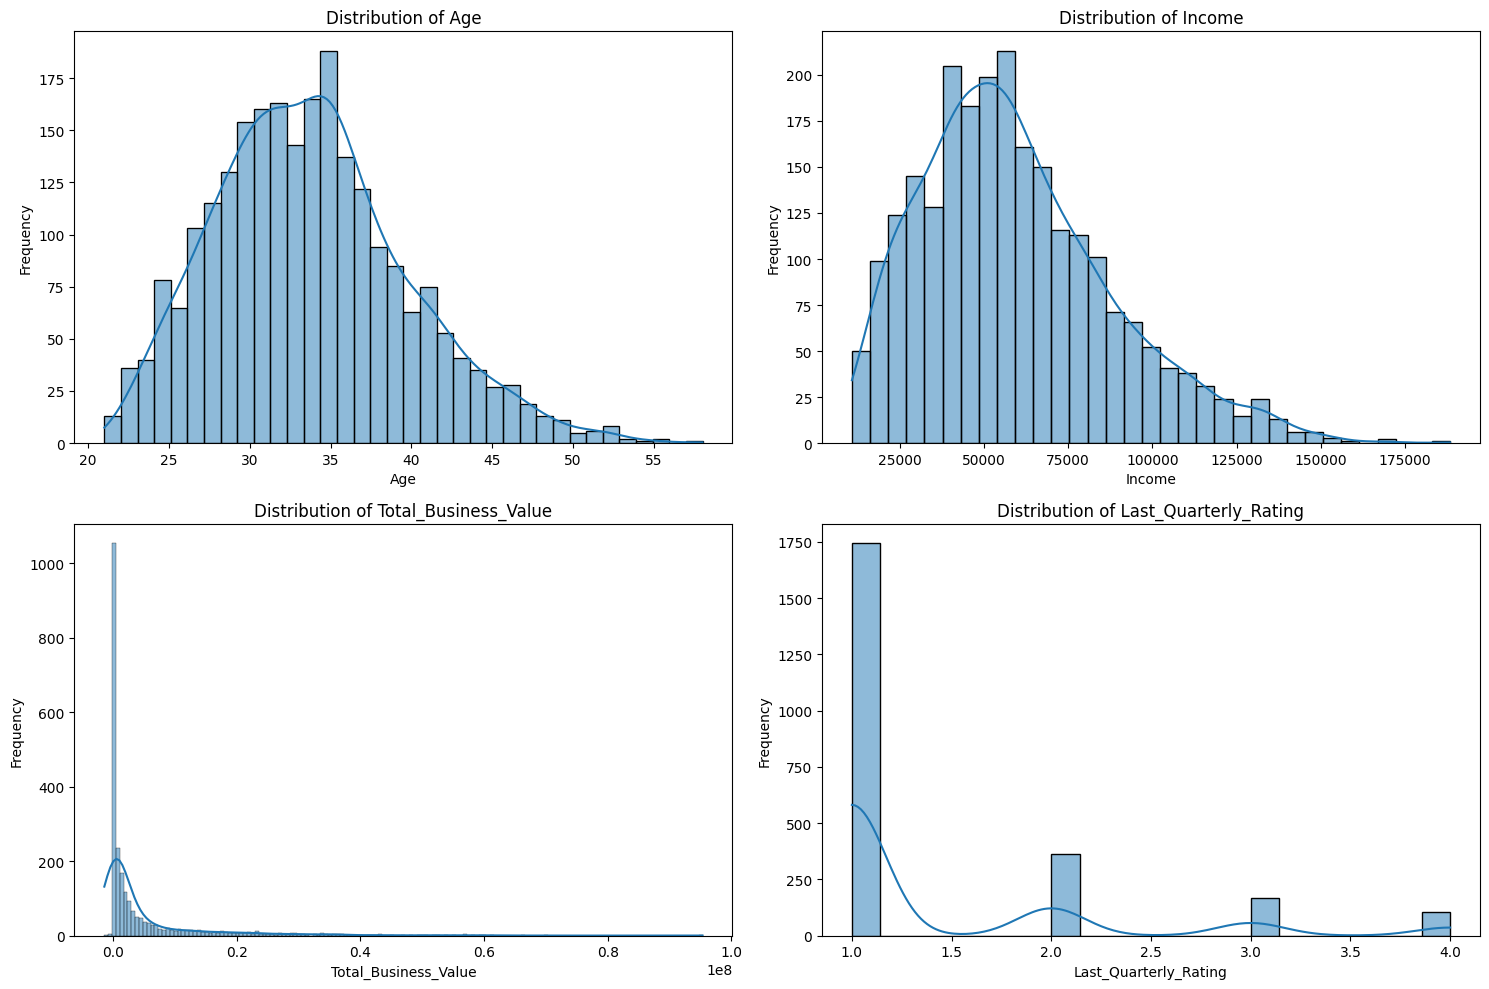

IndexError: index 4 is out of bounds for axis 0 with size 4

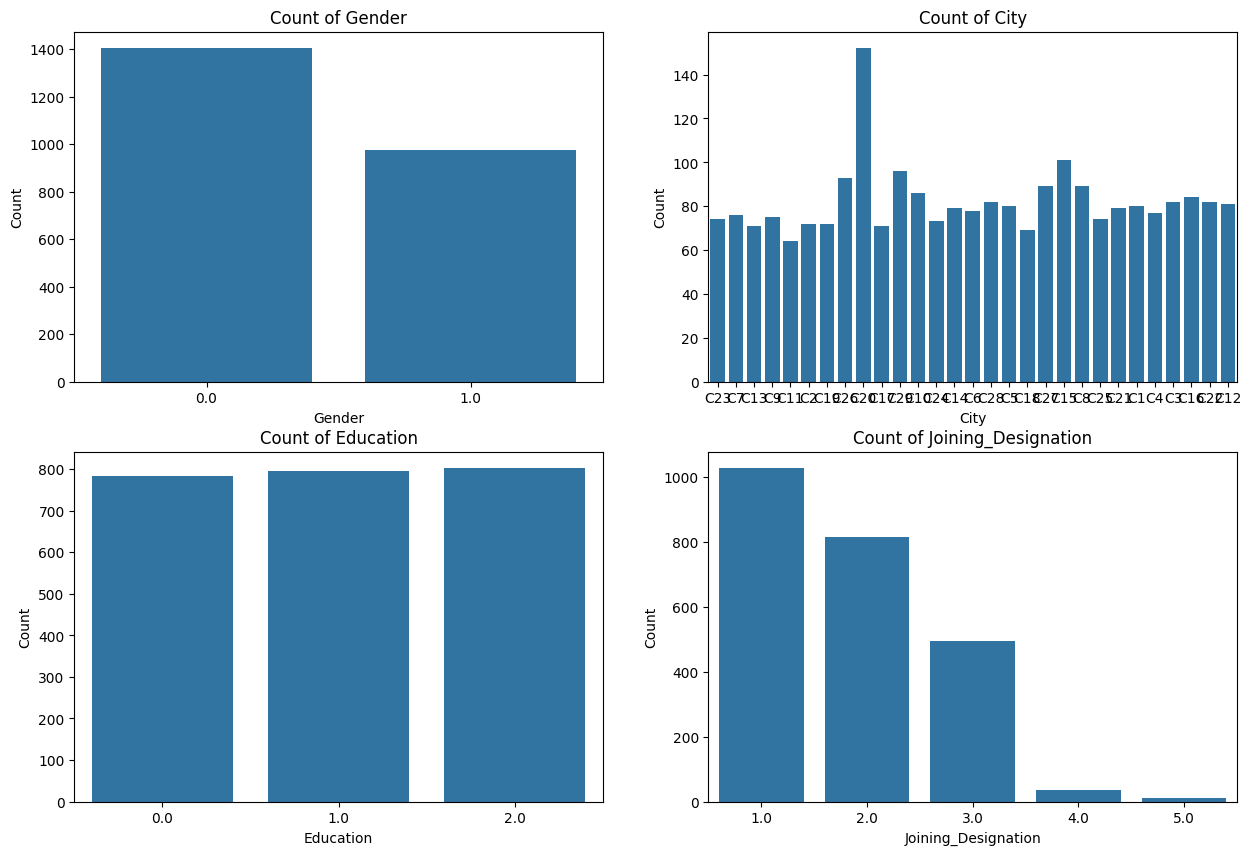

In [42]:
import seaborn as sns

numerical_columns = ['Age', 'Income', 'Total_Business_Value', 'Last_Quarterly_Rating']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(final_df[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot Categorical Features
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=final_df, ax=axs[i])
    axs[i].set_title(f'Count of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Bi-Variate Analysis

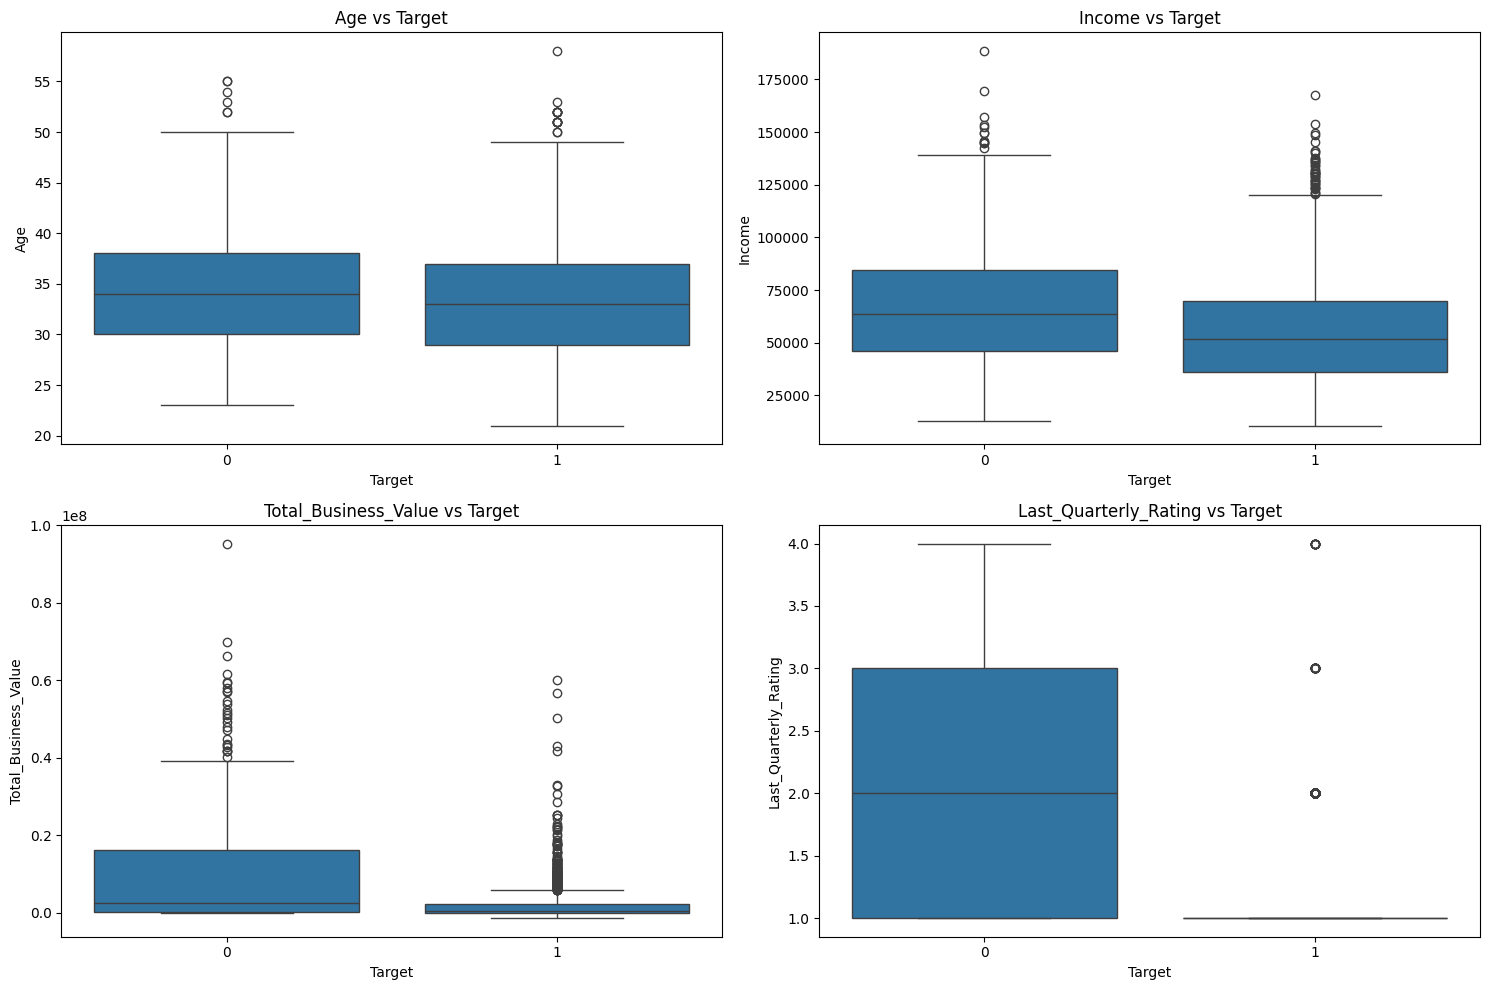

In [ ]:
# Numerical columns
numerical_columns = ['Age', 'Income', 'Total_Business_Value', 'Last_Quarterly_Rating']

# Create boxplots for numerical features by Target
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x='Target', y=col, data=final_df, ax=axs[i])
    axs[i].set_title(f'{col} vs Target')

plt.tight_layout()
plt.show()

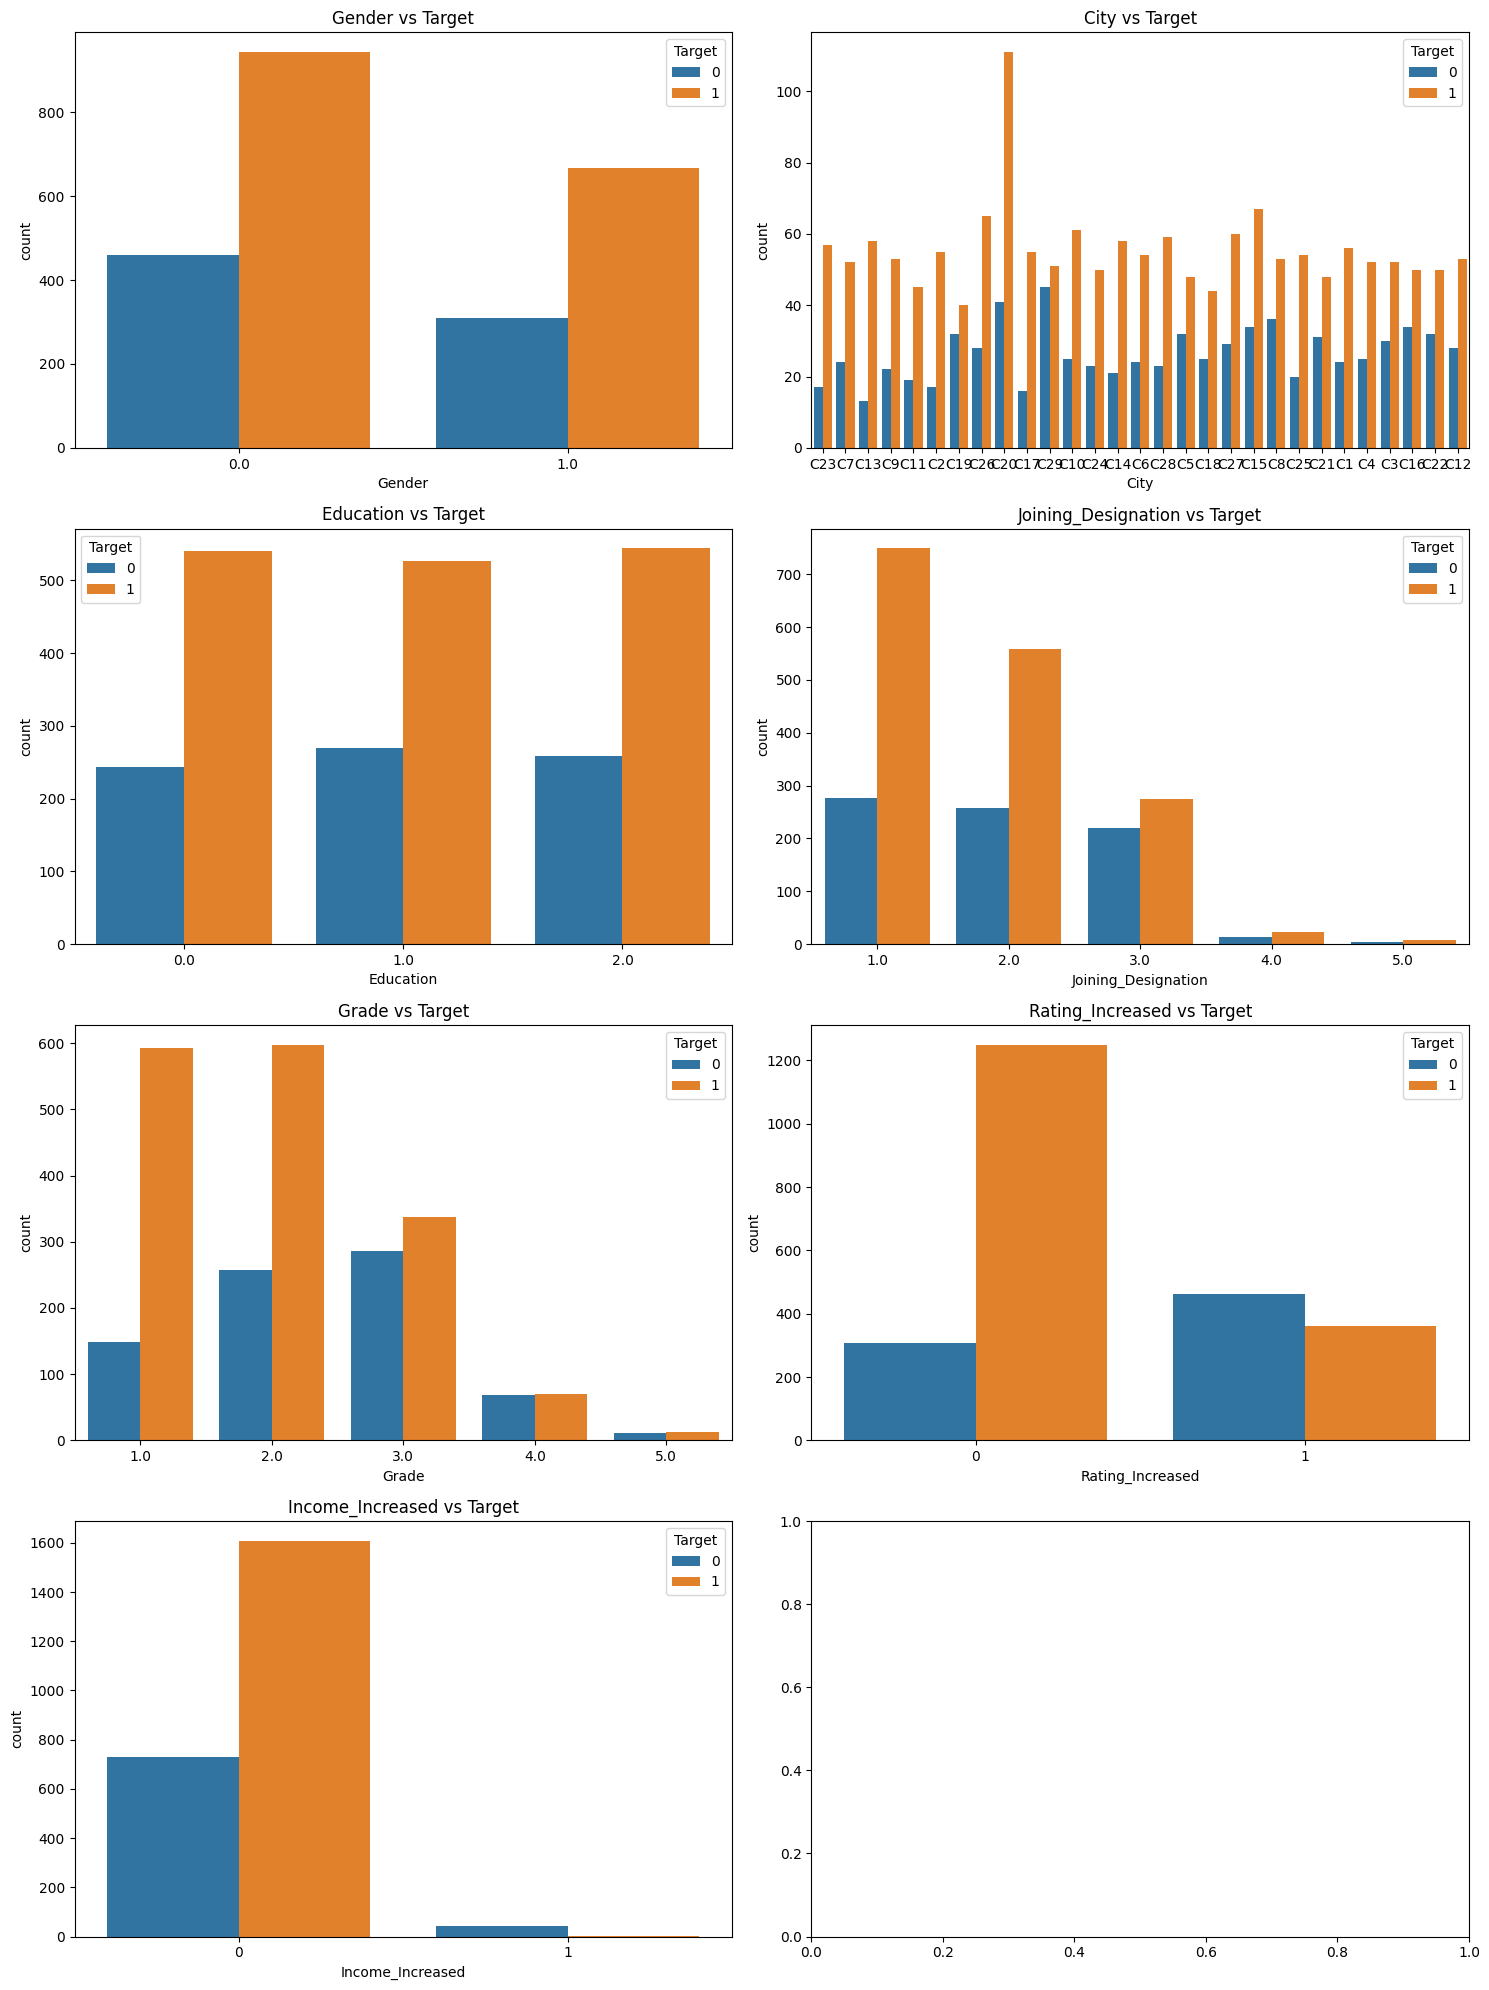

In [ ]:
# Categorical columns
categorical_columns = ['Gender', 'City', 'Education', 'Joining_Designation', 'Grade', 'Rating_Increased', 'Income_Increased']

# Create count plots for categorical features by Target
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs = axs.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Target', data=final_df, ax=axs[i])
    axs[i].set_title(f'{col} vs Target')

plt.tight_layout()
plt.show()


Insights

* The proportion of Age, gender and education is more or less the same for both the employees who left the organization and those who did not leave.
* The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.
* The employees whose quarterly rating has increased are less likely to leave the organization.
* The employees whose monthly salary has not increased are more likely to leave the organization.

### Correlation Analysis

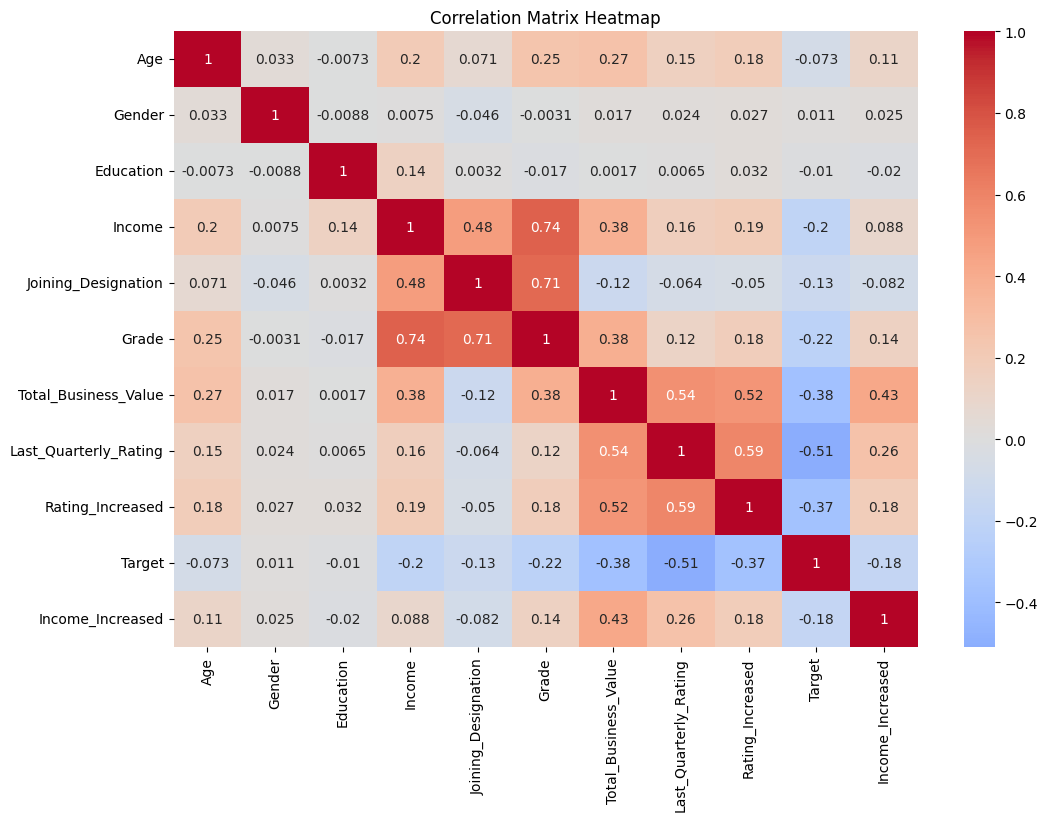

In [ ]:
correlation_df = final_df.drop(columns=['City', 'Driver_ID'])
correlation_matrix = correlation_df.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

* Grade vs Joining_Designation (0.71): High correlation suggests that these variables provide similar information.
* Grade vs Income (0.74): High correlation indicates redundancy.
* Total_Business_Value vs Income (0.38): Moderate correlation suggests some overlap.
* Last_Quarterly_Rating vs Rating_Increased (0.59): Strong correlation, which is expected, as one is derived from the other.

**Remove Grade: Redundant with Joining_Designation and Income**

In [ ]:
# Exclude Grade
final_df.drop(['Grade'], axis=1)

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Total_Business_Value,Last_Quarterly_Rating,Rating_Increased,Target,Income_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1715580.0,2.0,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,0.0,1.0,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,350000.0,1.0,0,1,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,120360.0,1.0,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,1265000.0,2.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,21748820.0,4.0,1,0,0
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,0.0,1.0,0,1,0
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2815090.0,1.0,0,1,0
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,977830.0,1.0,0,1,0


### Data Pre-Processing

In [ ]:
final_df.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Rating_Increased,Target,Income_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0


In [ ]:
final_df.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education', 'Income',
       'Joining_Designation', 'Grade', 'Total_Business_Value',
       'Last_Quarterly_Rating', 'Rating_Increased', 'Target',
       'Income_Increased'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler # type: ignore

# One-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Reshape the 'City' column to a 2D array
encoded_cities = ohe.fit_transform(final_df['City'].values.reshape(-1, 1))
city_df = pd.DataFrame(encoded_cities, columns=ohe.get_feature_names_out(['City']))
final_df = final_df.drop(columns=['City'])
final_df = pd.concat([final_df, city_df], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split # type: ignore
X = final_df.drop('Target', axis=1)
y = final_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
final_df.head()

,Driver_ID,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Rating_Increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1666, 40)
X_test Shape:  (715, 40)
y_train Shape:  (1666,)
y_test Shape:  (715,)


Random Forest Classifier - Before Balancing

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb # type: ignore
from sklearn.model_selection import  GridSearchCV
import time

params = {
    "max_depth": [3, 4, 5],
    "n_estimators": [50, 100, 150, 200],
}

start_time = time.time()
random_forest = RandomForestClassifier(class_weight="balanced")
c = GridSearchCV(estimator=random_forest, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)
elapsed_time = time.time() - start_time

print("\nElapsed Time: ", elapsed_time)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params:  {'max_depth': 5, 'n_estimators': 200}
Best Score:  0.8487502585480496

Elapsed Time:  2.2542989253997803


              precision    recall  f1-score   support

           0       0.75      0.61      0.67       235
           1       0.83      0.90      0.86       480

    accuracy                           0.80       715
   macro avg       0.79      0.76      0.77       715
weighted avg       0.80      0.80      0.80       715



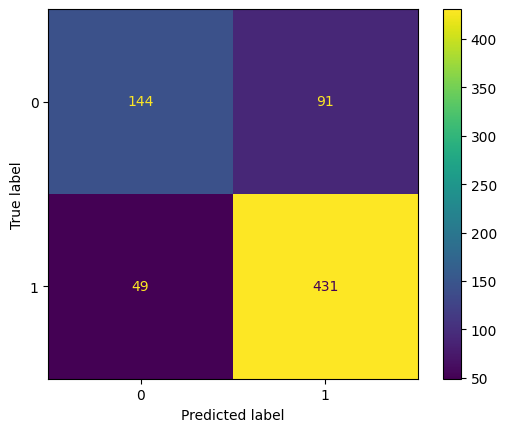

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

For class 0:

* Precision is 0.75, meaning 75% of the items predicted as class 0 are actually class 0.
* Recall is 0.61, meaning 61% of the actual class 0 items were identified correctly.
* F1-score is 0.67, which is the harmonic mean of precision and recall for class 0.

For class 1:

* Precision is 0.83, meaning 83% of the items predicted as class 1 are actually class 1.
* Recall is 0.90, meaning 90% of the actual class 1 items were identified correctly.
* F1-score is 0.86, which is the harmonic mean of precision and recall for class 1.

**Balancing Dataset using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 7)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 1131
Before OverSampling, counts of label '0': 535 

After OverSampling, the shape of train_X: (2262, 40)
After OverSampling, the shape of train_y: (2262,) 

After OverSampling, counts of label '1': 1131
After OverSampling, counts of label '0': 1131


c:\Users\Dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Dhanu\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dhanu\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

**Ensemble Learning: Bagging**

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params:  {'max_depth': 5, 'n_estimators': 50}
Best Score:  0.8207962949253651

Elapsed Time:  2.6791436672210693
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       235
           1       0.83      0.91      0.87       480

    accuracy                           0.81       715
   macro avg       0.80      0.76      0.78       715
weighted avg       0.81      0.81      0.81       715



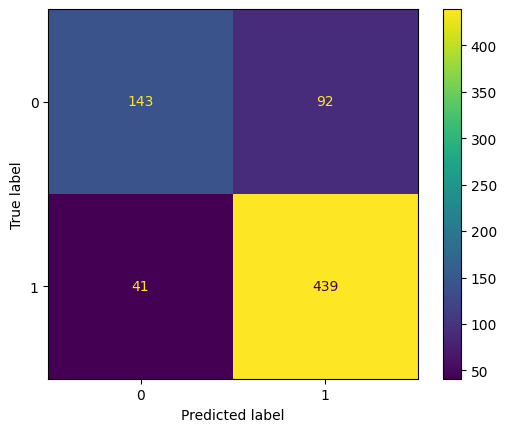

In [ ]:
params = {
    "max_depth": [3, 4, 5],
    "n_estimators": [50, 100, 150, 200],
}

start_time = time.time()
random_forest = RandomForestClassifier(class_weight="balanced_subsample")
c = GridSearchCV(estimator=random_forest, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)
elapsed_time = time.time() - start_time

print("\nElapsed Time: ", elapsed_time)

y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

For class 0:

* Precision is 0.78, indicating 78% of the items predicted as class 0 are actually class 0.
* 1Recall is 0.61, meaning 61% of the actual class 0 items were identified correctly.
* F1-score is 0.68, which is the harmonic mean of precision and recall for class 0.

For class 1:

* Precision is 0.83, indicating 83% of the items predicted as class 1 are actually class 1.
* Recall is 0.91, meaning 91% of the actual class 1 items were identified correctly.
* F1-score is 0.87, which is the harmonic mean of precision and recall for class 1.

Overall accuracy of Random Forest is 0.81, meaning 81% of the predictions are correct across all classes.

*ROC-AUC Curve*

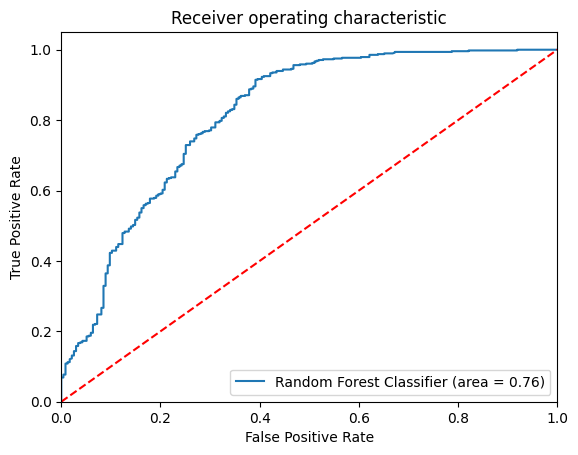

In [ ]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Ensemble Learning: Boosting 
Gradient Boosting Classifier**

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best Params:  {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5}
Best Score:  0.8222811671087533

 Elapsed Time:  91.05288672447205
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       235
           1       0.81      0.88      0.84       480

    accuracy                           0.78       715
   macro avg       0.75      0.73      0.74       715
weighted avg       0.77      0.78      0.77       715



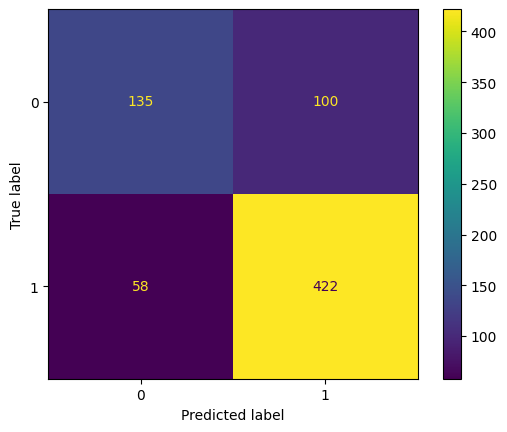

In [ ]:
params = {
    "max_depth": [3, 4, 5],
    "loss": ["log_loss", "exponential"],
    "subsample": [0.1, 0.2, 0.5, 0.8, 1],
    "learning_rate": [0.1, 0.2, 0.3],
    "n_estimators": [50,100,150,200]
}

gbdt = GradientBoostingClassifier()
start_time = time.time()
c = GridSearchCV(estimator=gbdt, cv=3, n_jobs=-1, verbose=True, param_grid=params)

c.fit(X_train, y_train)
print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)

elapsed_time = time.time() - start_time
print("\n Elapsed Time: ", elapsed_time)

y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

For class 0:

* Precision is 0.70, indicating 70% of the items predicted as class 0 are actually class 0.
* Recall is 0.57, meaning 57% of the actual class 0 items were identified correctly.
* F1-score is 0.63, which is the harmonic mean of precision and recall for class 0.

For class 1:

* Precision is 0.81, indicating 81% of the items predicted as class 1 are actually class 1.
* Recall is 0.88, meaning 88% of the actual class 1 items were identified correctly.
* F1-score is 0.84, which is the harmonic mean of precision and recall for class 1.

Overall accuracy of the Gradient Boosting Classifier is 0.78, indicating 78% of the predictions are correct across all classes.

**XGBoost Classifier**

c:\Users\Dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:20:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Score:  0.7888111888111888

               precision    recall  f1-score   support

           0       0.72      0.59      0.65       235
           1       0.81      0.89      0.85       480

    accuracy                           0.79       715
   macro avg       0.77      0.74      0.75       715
weighted avg       0.78      0.79      0.78       715



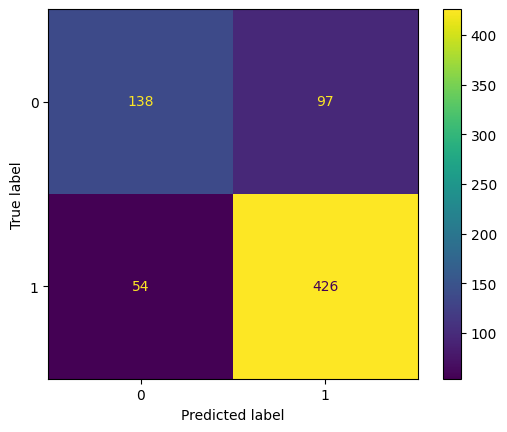

In [ ]:
model = xgb.XGBClassifier(class_weight = "balanced")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("XGBoost Classifier Score: ", model.score(X_test, y_test))
print("\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

For class 0:

* Precision is 0.72, meaning 72% of the items predicted as class 0 are actually class 0.
* Recall is 0.59, indicating 59% of the actual class 0 items were identified correctly.
* F1-score is 0.65, which is the harmonic mean of precision and recall for class 0.

For class 1:

* Precision is 0.81, indicating 81% of the items predicted as class 1 are actually class 1.
* Recall is 0.89, meaning 89% of the actual class 1 items were identified correctly.
* F1-score is 0.85, which is the harmonic mean of precision and recall for class 1.

Overall accuracy of the XGBoost classifier model is 0.79, meaning 79% of the predictions are correct across all classes.

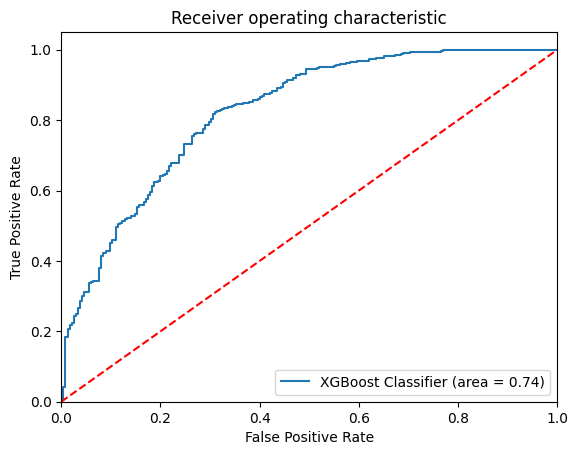

In [ ]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='XGBoost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Based on the evaluation of three different models – Gradient Boosting Classifier, XGBoost Classifier, and Random Forest – we can draw some conclusions:

* Gradient Boosting Classifier: This model achieved an accuracy of 78%, with class 0 having a precision of 0.70 and recall of 0.57, and class 1 having a precision of 0.81 and recall of 0.88. While it performs decently, there's room for improvement in classifying class 0 instances.

* XGBoost Classifier: With an accuracy of 79%, this model demonstrated better performance in classifying both class 0 and class 1 instances, with precision and recall values of 0.72 and 0.59 for class 0, and 0.81 and 0.89 for class 1, respectively.

* Random Forest: Achieving an accuracy of 81%, this model outperformed the others. It showed balanced precision and recall for both classes, with class 0 having a precision of 0.78 and recall of 0.61, and class 1 having a precision of 0.83 and recall of 0.91.

### Actionable Insights and Recommendation

Pointer: Employee retention efforts should focus on factors beyond demographic variables like age, gender, and education, as they show similar distributions for both retained and churned employees.

Actionable Insights and Recommendations:

1. Grade and Joining Designation: Leverage insights from the high correlation (0.71) between Grade and Joining Designation. Identify potential career progression paths or training programs for employees at lower designations to increase retention.
2. Income and Grade: Due to high correlation (0.74), it's evident that salary plays a significant role in employee retention. Consider revising the compensation structure to align with employee performance and tenure.
3. Quarterly Rating: Employees whose quarterly rating has increased are less likely to leave. Implement strategies to provide regular feedback and recognize achievements to motivate employees and improve retention.
4. Monthly Salary Increase: Employees who haven't seen a salary increase are more likely to leave. Conduct salary reviews and ensure competitive compensation to retain top talent.
5. Machine Learning Model Insights: Random Forest outperformed other models, indicating its potential for predicting churn. Invest in further optimizing this model and integrating it into HR systems for proactive churn management.